In [1]:
%load_ext autoreload
%autoreload 2
import random
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt

In [2]:
import os
import seaborn as sns
import pandas as pd
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import matplotlib.pyplot as plt
plt.style.use(['science'])

# 1. Evol

In [3]:
path = "../../data/coevolution_res/finer2"
grid_res = list()
means = list()
alls = dict()
for filename in os.listdir(path):
        if filename.endswith('report.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            #filename = filename.replace('comm_rate','commrate').replace('shared_discount','shareddiscount')
            for h in filename[:-4].split("-")[1:]:
                field = h.split("_")[0]
                val = h.split("_")[-1]
                try: 
                    val = float(val)
                except:
                    pass
                df[field]= val  
            df['travel_decisions'] = df.travel_decisions.apply(lambda x: x.split("\n")[1:-1])
            df['travel_decisions'] = df['travel_decisions'].apply(lambda x: dict([(_.split(" ")[0],int(_.split(" ")[-1])) for _ in x]))
            df['out'] = df.travel_decisions.apply(lambda x: x.get('out',0))
            df['rh'] = df.travel_decisions.apply(lambda x: x.get('rh',0))
            df['rp'] = df.travel_decisions.apply(lambda x: x.get('rp',0))
            df['filename'] = filename.split("/")[-1]
            df.columns = [_.replace("_"," ") for _ in df.columns]
            df['share trav'] = df['n trav']/df.nP
            df['share drivers'] = df['n drivers']/df.nV
            df['share learned rp'] = df['learned rp']/df.nP
            df['share learned rh'] = df['learned rh']/df.nP
            df['share learned drivers'] = df['learned drivers']/df.nV
        
            means.append(df[df.day>=(df.day.max()-5)].mean())
            grid_res.append(df)
            alls[filename] = df
            
means = pd.concat(means, axis = 1).T.reset_index()
grid_res = pd.concat(grid_res)
grid_res.nV=grid_res.nV.astype(int)
grid_res.nP=grid_res.nP.astype(int)
means.nV=means.nV.astype(int)
means.nP=means.nP.astype(int)
means['share out'] = means['out']/means.nP
means['share rh'] = means['rh']/means.nP
means['share rp'] = means['rp']/means.nP
means['share drivers'] = means['n drivers']/means.nV
grid_res['$c$'] = grid_res['comm rate']
grid_res['$p$'] = grid_res['discount']
means['$c$'] = means['comm rate'].round(2)
means['$p$'] = means['discount'].round(2)
df.head()

,day,nP,nV,comm rate,discount,travel decisions,n trav,n drivers,fare,commision,...,dt,out,rh,rp,filename,share trav,share drivers,share learned rp,share learned rh,share learned drivers
0,0,1100.0,60.0,1.1,0.2,"{'out': 435, 'rh': 308, 'rp': 357}",665,60,0.0000,0.0000,...,report,435,308,357,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.604545,1.000000,0.000000,0.000000,0.0
1,1,1100.0,60.0,1.1,0.2,"{'out': 453, 'rh': 323, 'rp': 324}",647,34,0.0000,0.0000,...,report,453,323,324,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.588182,0.566667,0.000000,0.000000,0.0
2,2,1100.0,60.0,1.1,0.2,"{'out': 513, 'rh': 282, 'rp': 305}",587,43,3333.2628,239.1816,...,report,513,282,305,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.533636,0.716667,0.002727,0.002727,0.0
3,3,1100.0,60.0,1.1,0.2,"{'out': 527, 'rh': 286, 'rp': 287}",573,42,3232.2780,194.4810,...,report,527,286,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.520909,0.700000,0.010000,0.011818,0.0
4,4,1100.0,60.0,1.1,0.2,"{'out': 539, 'rh': 274, 'rp': 287}",561,46,3187.0468,196.9380,...,report,539,274,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.510000,0.766667,0.020000,0.044545,0.0


nP:900 	 nV:50 	 p:0.1 	 c:0.7


Failed to find a Ghostscript installation.  Distillation step skipped.


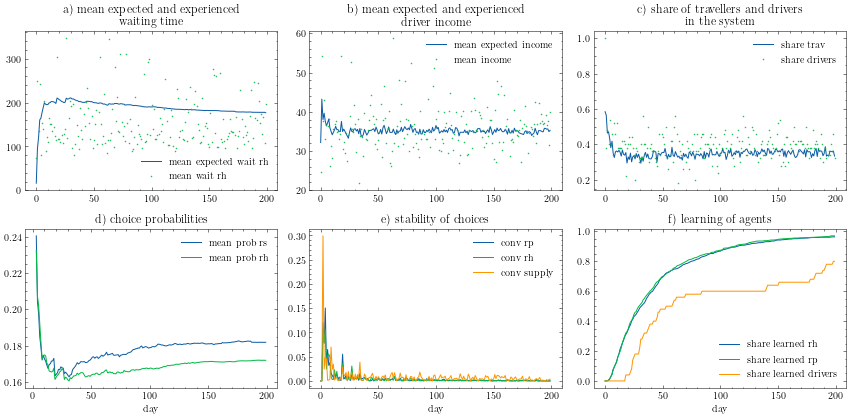

In [4]:
def plot_evol(grid_res,
              nP = 700,
              nV = 10,
              discount = 0,
              comm_rate = 0.7):
    print('nP:{} \t nV:{} \t p:{} \t c:{}'.format( nP, nV, discount, comm_rate))
    def sct(cols, ax, title):
        report[cols[1]].plot(ax=ax, title = title, lw = 1, label = cols[1])
        report[cols[0]].plot(ax=ax, style = '.', ms = 1, label = cols[0])
        ax.legend()
        
    
    report = grid_res[(grid_res.nP == nP) & (grid_res.nV == nV) & (grid_res.discount == discount) & (grid_res['comm rate'] == comm_rate)]
    #report.columns  = [_.replace("_"," ") for _ in report.columns]
    #report['share trav'] = report['n trav']/report.nP
    #report['share drivers'] = report['n drivers']/report.nV
    #report['share learned rp'] = report['learned rp']/report.nP
    #report['share learned rh'] = report['learned rh']/report.nP
    #report['share learned drivers'] = report['learned drivers']/report.nV
    fig, ax = plt.subplots(2,3, figsize = (12,6))
    ax = ax.flatten()
    sct(['mean wait rh','mean expected wait rh'], ax[0], title = 'a) mean expected and experienced  \nwaiting time')
    #report[['mean wait rh']].plot(ax=ax[0], style = '.', ms = 1)
    #sct(['mean wait rp','mean expected wait rp'], ax[1], title = 'mean expected and experienced \nwait time pooled ride')
    #sct(['mean travel rp','mean expected travel rp'], ax[2], title = 'mean expected and experienced \n travel time pooled ride')
    sct(['mean income','mean expected income'], ax[1],  title = 'b) mean expected and experienced \n driver income')
    sct(['share drivers','share trav'], ax[2], title = 'c) share of travellers and drivers \n in the system')
    report[report.day>2][['mean prob rs','mean prob rh']].plot(ax=ax[3], title = 'd) choice probabilities', lw = 1)
    report[['share learned rh','share learned rp','share learned drivers']].plot(ax=ax[5], title = 'f) learning of agents', lw = 1)
    report[['conv rp','conv rh','conv supply']].plot(ax=ax[4], title = 'e) stability of choices', lw =1 )
    #report['share rp'] = report['rp']/report.nP
    #sct( ['n actually sharing', 'shareability'], ax[8], title = 'efficiency of sharing (shareability)')
    #report[['fare','commision','income']].plot(ax=ax[6], title = 'fares, revenues and commissions')
    #ax[9].set_ylim((0,4000))
    for i in [3,4,5]:
        ax[i].set_xlabel('day')
    #fig.suptitle('learning evolution')
    fig.tight_layout() 
    plt.savefig('evol.eps')
plot_evol(grid_res, nP = 900, nV = 50, discount = 0.1, comm_rate = 0.7)

-----

# 2. Grid

In [6]:
path = "../../data/coevolution_res/finer2"
grid_res = list()
means = list()
alls = dict()
for filename in os.listdir(path):
        if filename.endswith('report.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            #filename = filename.replace('comm_rate','commrate').replace('shared_discount','shareddiscount')
            for h in filename[:-4].split("-")[1:]:
                field = h.split("_")[0]
                val = h.split("_")[-1]
                try: 
                    val = float(val)
                except:
                    pass
                df[field]= val  
            df['travel_decisions'] = df.travel_decisions.apply(lambda x: x.split("\n")[1:-1])
            df['travel_decisions'] = df['travel_decisions'].apply(lambda x: dict([(_.split(" ")[0],int(_.split(" ")[-1])) for _ in x]))
            df['out'] = df.travel_decisions.apply(lambda x: x.get('out',0))
            df['rh'] = df.travel_decisions.apply(lambda x: x.get('rh',0))
            df['rp'] = df.travel_decisions.apply(lambda x: x.get('rp',0))
            df['filename'] = filename.split("/")[-1]
            df.columns = [_.replace("_"," ") for _ in df.columns]
        
            means.append(df[df.day>=(df.day.max()-5)].mean())
            grid_res.append(df)
            alls[filename] = df
            
means = pd.concat(means, axis = 1).T.reset_index()
grid_res = pd.concat(grid_res)
grid_res.nV=grid_res.nV.astype(int)
grid_res.nP=grid_res.nP.astype(int)
means.nV=means.nV.astype(int)
means.nP=means.nP.astype(int)
means['share out'] = means['out']/means.nP
means['share rh'] = means['rh']/means.nP
means['share rp'] = means['rp']/means.nP
means['share drivers'] = means['n drivers']/means.nV
grid_res['$c$'] = grid_res['comm rate']
grid_res['$p$'] = grid_res['discount']
means['$c$'] = means['comm rate'].round(2)
means['$p$'] = means['discount'].round(2)
df.head()

,day,nP,nV,comm rate,discount,travel decisions,n trav,n drivers,fare,commision,...,n actually sharing,n shared rides,unserved,comm,shared,dt,out,rh,rp,filename
0,0,1100.0,60.0,1.1,0.2,"{'out': 435, 'rh': 308, 'rp': 357}",665,60,0.0000,0.0000,...,241,120,0,1.1,0.2,report,435,308,357,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
1,1,1100.0,60.0,1.1,0.2,"{'out': 453, 'rh': 323, 'rp': 324}",647,34,0.0000,0.0000,...,204,102,0,1.1,0.2,report,453,323,324,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
2,2,1100.0,60.0,1.1,0.2,"{'out': 513, 'rh': 282, 'rp': 305}",587,43,3333.2628,239.1816,...,192,96,0,1.1,0.2,report,513,282,305,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
3,3,1100.0,60.0,1.1,0.2,"{'out': 527, 'rh': 286, 'rp': 287}",573,42,3232.2780,194.4810,...,163,81,0,1.1,0.2,report,527,286,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...
4,4,1100.0,60.0,1.1,0.2,"{'out': 539, 'rh': 274, 'rp': 287}",561,46,3187.0468,196.9380,...,188,94,0,1.1,0.2,report,539,274,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...


300 10
300 30
300 50
300 60
500 10
500 30
500 50
500 60
700 10
700 30
700 50
700 60
900 10
900 30
900 50
900 60
1100 10
1100 30
1100 50
1100 60


Failed to find a Ghostscript installation.  Distillation step skipped.


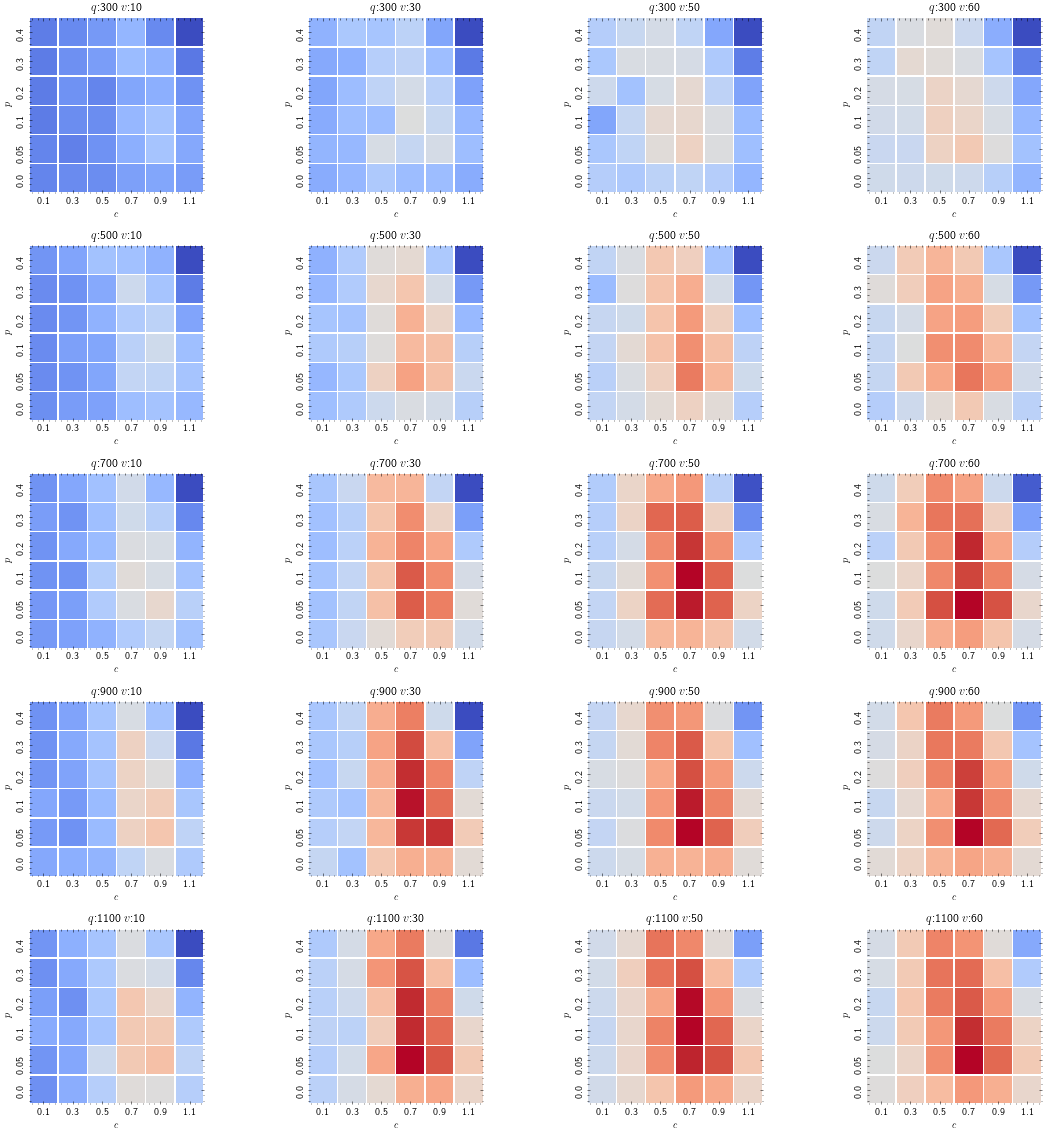

In [7]:
df = means
fig, ax = plt.subplots(means.nP.nunique()-2,means.nV.nunique()-2,figsize = (16,16))
ax = ax.flatten()
i = 0
sns.set(font_scale=1)
for nP in pd.Series(means.nP.unique()).sort_values().values[1:-1]:
    for nV in pd.Series(means.nV.unique()).sort_values().values[[0,2,4,5]]:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['commision']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=False, fmt = 'd', cmap='coolwarm', ax = ax[i], square = True, cbar = False, linewidths = 0.5, center = 200) #, annot_kws={"size": 8})
        ax[i].set_title('$q$:{} \t $v$:{}'.format(nP,nV), fontsize = 12)
        i+=1 
        print(nP,nV)
fig.tight_layout()
plt.savefig('grid.eps')